In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
dirn = './data/'
filen = 'ecmwfForecast20190901_rain.nc'
dat = xr.open_dataset(dirn+filen)
rain = dat['tp_P11_L1_GLL0_acc']

filen = 'ecmwfForecast20190901_windspeed.nc'
dat = xr.open_dataset(dirn+filen)
dat
windspeed = dat['__xarray_dataarray_variable__']

In [3]:
rain

<xarray.DataArray 'tp_P11_L1_GLL0_acc' (ensemble0: 50, forecast_time0: 21, lat_0: 61, lon_0: 81)>
[5188050 values with dtype=float32]
Coordinates:
  * lon_0                (lon_0) float32 270.0 270.5 271.0 ... 309.0 309.5 310.0
  * ensemble0            (ensemble0) int32 0 1 2 3 4 5 6 ... 44 45 46 47 48 49
  * forecast_time0       (forecast_time0) timedelta64[ns] 0 days 00:00:00 ... 5 days 00:00:00
    initial_time0_hours  datetime64[ns] ...
  * lat_0                (lat_0) float32 40.0 39.5 39.0 38.5 ... 11.0 10.5 10.0
Attributes:
    production_status:                              TIGGE Operational products
    center:                                         European Center for Mediu...
    type_of_statistical_processing:                 Accumulation
    long_name:                                      total precipitation
    parameter_template_discipline_category_number:  [11  0  1 52]
    grid_type:                                      Latitude/longitude
    units:                   

OK, we've prepared and loaded the data for you.  Now it's your turn to use what you learned from the last class to examine the forecasts for Hurricane Dorian.  Start by plotting the total rainfall accumulation predicted for September 1 - 6, 2019 in the first ensemble member.

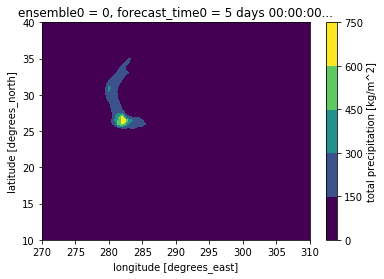

In [6]:
# write your code here:

rain.sel(ensemble0=0,forecast_time0='5 days').plot.contourf()

Now do the same for the maximum surface wind speed predicted to occur during the same period (Sept. 1-6, 2019), again for the first ensemble member.  Although you could look up how to find the maximum value, I'll tell you that the code for taking the maximum value over the forecast period looks like this:

In [ ]:
windspeed.sel(forecast_time0=slice('0 days','5 days')).max(dim='forecast_time0')

In [ ]:
# write your code here:


Do all the ensemble members look the same?  Using maps of the maximum surface wind speed, can you find a forecast that says landfall will occur in Florida?  What about Georgia? 

In [ ]:
# plot a wind speed forecast that has a different track from the one seen above:


If you had to tell the public the most likely track of the storm, how would you determine that track?  Use the below space to make a plot that could tell you that:

Now let's try to find the probability of extreme wind and rainfall at particular locations.  We'll assess probability by looking at the distribution of the ensemble members.  Let's start by picking one location (but note that longitude in this dataset goes from 0-360E, so you'll need to convert any longitudes that are given as -70 or 70W):

In [ ]:
# choose a location here:
lonchoice = 
latchoice = 
rainAtLocation = rain.sel(lat_0=latchoice,lon_0=lonchoice,method='nearest')
rainAtLocation

To visualize the forecasts of rain at that location, we can plot the *time series* of rain accumulation for each forecast, so we'll have a figure with 50 different lines (since there are 50 ensemble members).  To do this, we need to write a loop:

In [ ]:
for ensembleMember in rainAtLocation.ensemble0:
    rainAtLocation.sel(ensemble0=ensembleMember).plot()

This is a little messy, and it's hard to tell what amount of rainfall is the most likely.  We can visualize the probability distribution better by plotting a *histogram* of the total rain accumulated on day 5:

In [ ]:
rainAtLocation.sel(forecast_time0='5 days').plot.hist()
plt.xlabel('rain accumulation')
plt.ylabel('number of ensemble members')

What is the most likely amount of rainfall that this location will receive between Sept. 1-6, 2019?  If you had to assign a probability of receiving at least a certain amount of rainfall, how would you do that?

Now estimate the probability of your location receiving hurricane-force winds.  Unless you happen to know this already, you'll probably have to look up the *Saffir-Simpson* scale to find out the definition of hurricane-force winds.